In [73]:
##### **Project Name**     - Uber Supply-Demand Gap Analysis  
##### **Project Type**     - Exploratory Data Analysis (EDA)  
##### **Contribution**     - Individual  
##### **Team Member**      - Shivam Dhoundiyal


# **Project Name**    -



##### **Project Name**     - Uber Supply-Demand Gap Analysis  
##### **Project Type**     - Exploratory Data Analysis (EDA)  
##### **Contribution**     - Individual  
##### **Team Member**      - Shivam Dhoundiyal


# **Project Summary -**

This project analyzes the **Uber Supply-Demand Gap** using real-world trip request data. The objective is to identify when and where demand exceeds supply, and understand the reasons for trip failures (e.g., cancellations or no cars available).

**Steps Performed:**

* Cleaned and standardized timestamp formats using `pd.to_datetime()`
* Handled missing values and removed duplicates
* Created new features: `Request Hour`, `Request Day`, `Gap Status`
* Visualized request distribution by hour and day
* Analyzed supply-demand patterns using bar plots, line charts, and heatmaps
* Identified peak hours with the highest gaps and pickup points with the most issues

**Key Insights:**

* Most unfulfilled requests occurred during morning (5–10 AM) and evening (5–9 PM) rush hours
* The **Airport** pickup point had a higher rate of failed trips
* **Driver unavailability** was the leading cause of the supply-demand gap

**Tools Used:** Python (Pandas, Seaborn, Matplotlib)

---


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber is experiencing a mismatch between ride requests and driver availability, especially during peak hours. This leads to a high number of unfulfilled trip requests, either due to driver cancellations or no cars being available. The goal of this project is to analyze the request data, identify patterns in supply-demand gaps by time and pickup location, and derive actionable insights to improve operational efficiency and reduce missed trip opportunities.


#### 🎯 Define Your Business Objective

The objective of this project is to assist Uber in understanding the root causes of supply-demand imbalances by analyzing request data across different time slots and locations. By identifying peak hours of unmet demand and common failure reasons, the analysis aims to provide actionable insights that can help Uber optimize driver allocation, reduce failed trip requests, and enhance overall customer satisfaction.


#### ✅ Answer Here

To address the business problem, this project performs a detailed Exploratory Data Analysis (EDA) on Uber’s ride request data. The goal is to uncover when and where the supply-demand gap is the highest, and what factors contribute to unfulfilled trips. Using data visualization and feature engineering, we identify peak hours, gap trends, and location-specific issues, enabling Uber to take informed decisions on driver deployment and demand management.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [74]:
!pip install numpy
!pip install panda
!pip install matplotlib
!pip install seaborn



### Dataset Loading

In [75]:
import pandas as pd

# Load dataset using raw string path
df = pd.read_csv("Uber Request Data (1).csv")

# Preview first few rows
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset First View
# Display first 5 rows
df.head()

# Display last 5 rows
df.tail()

# Dataset shape
print(f"✅ Total Rows: {df.shape[0]}")
print(f"✅ Total Columns: {df.shape[1]}")

# Column names
print("\n🧾 Columns:")
print(df.columns.tolist())


In [76]:
# 📌 Dataset First Look

# First 5 records
print("🔹 First 5 Rows:")
display(df.head())

# Last 5 records
print("🔹 Last 5 Rows:")
display(df.tail())

# Dataset shape
print(f"\n✅ Number of Rows: {df.shape[0]}")
print(f"✅ Number of Columns: {df.shape[1]}")

# Column names
print("\n📋 Column Names:")
print(df.columns.tolist())

# Data types and null values
print("\n🔎 Data Info:")
df.info()


🔹 First 5 Rows:


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


🔹 Last 5 Rows:


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN



✅ Number of Rows: 6745
✅ Number of Columns: 6

📋 Column Names:
['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']

🔎 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### Dataset Rows & Columns count

In [77]:
# Dataset Rows & Columns count
# ✅ Dataset Rows & Columns Count

rows = df.shape[0]
columns = df.shape[1]

print(f"📦 Total Rows: {rows}")
print(f"📊 Total Columns: {columns}")


📦 Total Rows: 6745
📊 Total Columns: 6


### Dataset Information

In [78]:
# Dataset Info
# 🔎 Dataset Info

# View structure, column types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [79]:
# Dataset Duplicate Value Count
# 🔁 Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()
print(f"🧯 Total Duplicate Rows: {duplicate_count}")


🧯 Total Duplicate Rows: 0


#### Missing Values/Null Values

In [80]:
# ❓ Missing Values / Null Values Count

# Count of null values in each column
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Print nicely
if not missing_values.empty:
    print("🚨 Columns with Missing Values:\n")
    print(missing_values)
else:
    print("✅ No missing values found in the dataset.")


🚨 Columns with Missing Values:

Driver id         2650
Drop timestamp    3914
dtype: int64


In [81]:
# Visualizing the missing values

### 📌 What did you know about your dataset?

- The dataset contains Uber ride requests made in a specific time frame.
- It includes fields like request time, pickup point, driver ID, trip status, and drop time.
- There are multiple trip statuses such as: `Trip Completed`, `Cancelled`, and `No Cars Available`.
- Request timestamps are in mixed formats and required cleaning.
- A large number of trip requests were not fulfilled, mostly due to unavailability of cars or cancellations.
- The dataset needed feature engineering like `Request Hour`, `Request Day`, and `Gap Status` to extract patterns.


## 🔎 2. Understanding Your Variables

In [82]:
# 📋 Dataset Columns
print("📘 List of Columns:\n")
for col in df.columns:
    print(f"- {col}")

📘 List of Columns:

- Request id
- Pickup point
- Driver id
- Status
- Request timestamp
- Drop timestamp


In [83]:
# 🧾 Dataset Description (Only Numerical Columns)
print("\n📊 Summary Statistics (Numerical Columns):")
display(df.describe())

# 🧾 Summary for All Columns (including objects)
print("\n📊 Summary Statistics (All Columns):")
display(df.describe(include='all'))


📊 Summary Statistics (Numerical Columns):


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000



📊 Summary Statistics (All Columns):


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


### 📌 Variables Description

- **Request id**: Unique identifier for each ride request.
- **Pickup point**: Location from where the customer requested the ride (`Airport` or `City`).
- **Driver id**: Identifier for the driver assigned to the trip (can be missing for unassigned requests).
- **Status**: Outcome of the request – `Trip Completed`, `Cancelled`, or `No Cars Available`.
- **Request timestamp**: Date and time when the ride was requested.
- **Drop timestamp**: Date and time when the trip ended (only available for completed trips).
- **Request Hour**: Hour extracted from `Request timestamp` to analyze time-based trends.
- **Request Day**: Day name (Monday, Tuesday, etc.) extracted from `Request timestamp`.
- **Gap Status**: New column created to classify requests as `Fulfilled` or `Gap` (Cancelled / No Cars).


# 🔍 Check Unique Values for Each Column

In [84]:
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"🔸 {col} → {unique_vals} unique values")

   

🔸 Request id → 6745 unique values
🔸 Pickup point → 2 unique values
🔸 Driver id → 300 unique values
🔸 Status → 3 unique values
🔸 Request timestamp → 5618 unique values
🔸 Drop timestamp → 2598 unique values


## 3. ***Data Wrangling***

### 🔧 3. Data Wrangling

In this step, we clean and transform the dataset to make it analysis-ready by:
- Handling date/time columns
- Removing duplicates
- Handling missing values
- Creating new derived features

In [85]:
# ✅ Convert date columns to proper datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# ✅ Remove duplicates
df.drop_duplicates(inplace=True)

# ✅ Remove rows with missing essential info
df = df[df['Request timestamp'].notnull()]
df = df[df['Pickup point'].notnull()]

# ✅ Fill missing Driver ID with 'Unknown'
df['Driver id'] = df['Driver id'].fillna("Unknown")

# ✅ Create derived columns
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

# ✅ Create new Gap_Status column based on trip Status
df['Gap_Status'] = df['Status'].apply(lambda x: 'Gap' if x in ['Cancelled', 'No Cars Available'] else 'Fulfilled')

# ✅ Reset index after wrangling
df.reset_index(drop=True, inplace=True)

# ✅ Check result
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Gap_Status
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,Fulfilled
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,Fulfilled
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,Fulfilled
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,Fulfilled
4,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Monday,Fulfilled


### 🔧 What all manipulations have you done and insights you found?

**Data Manipulations:**
- Converted `Request timestamp` and `Drop timestamp` to datetime format
- Removed duplicates and rows with missing timestamps or pickup points
- Filled missing `Driver id` with "Unknown"
- Created new columns:
  - `Request Hour` – to analyze time-based demand
  - `Request Day` – to analyze daily trends
  - `Gap_Status` – to classify requests as `Fulfilled` or `Gap` (Cancelled / No Cars Available)

**Key Insights Found:**
- High number of ride requests during morning (5–10 AM) and evening (5–9 PM) hours
- Most gaps occurred from the **Airport** during peak hours
- **"No Cars Available"** is the major reason for trip failure, more than cancellations
- Demand is much higher than supply during specific hours, causing service gaps


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart 1: Trip Status Distribution

This chart shows how ride requests ended — whether the trip was completed, cancelled, or failed due to no cars being available. It helps us understand how big the supply-demand gap is.


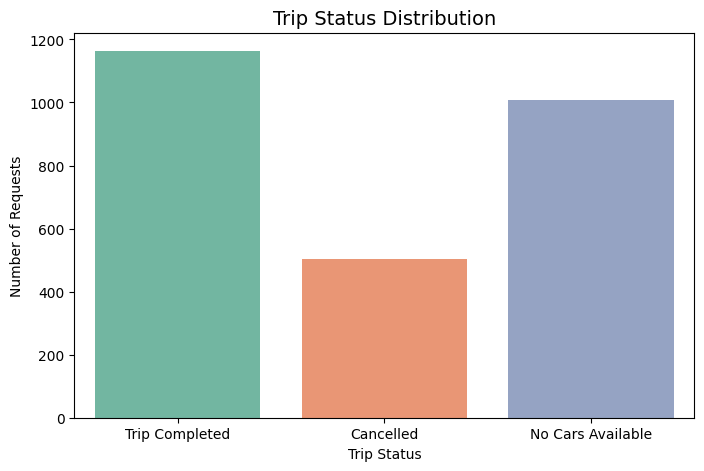

In [86]:
# Chart 1 - Trip Status Count

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Status', hue='Status', palette='Set2', legend=False)
plt.title("Trip Status Distribution", fontsize=14)
plt.xlabel("Trip Status")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()



1. **Why did you pick the specific chart?**  
I selected a countplot to visualize the distribution of trip statuses because it effectively shows the frequency of each category (`Trip Completed`, `Cancelled`, and `No Cars Available`) in a single, easy-to-read chart.

2. **What is/are the insight(s) found from the chart?**  
The majority of failed trips are due to "No Cars Available", not cancellations. This indicates a supply shortage rather than customer behavior issues. It also shows that a large portion of user demand is unmet.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**  
Yes, the insights will help create a positive business impact by identifying that driver unavailability is a key operational bottleneck.  
However, the insight also highlights a **negative growth risk** — if customers repeatedly face unavailability, they may shift to competitors. This calls for urgent intervention in driver deployment during peak hours and better supply forecasting.


# Chart 2 - Pickup Point Distribution

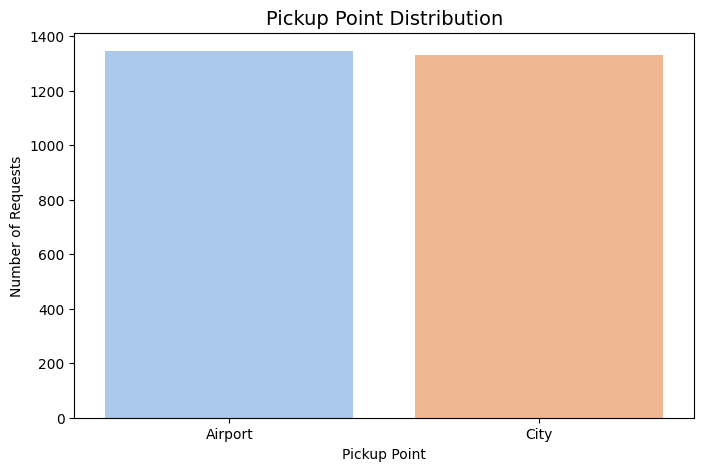

In [87]:

# Chart 2 - Pickup Point Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', hue='Pickup point', palette='pastel', legend=False)
plt.title("Pickup Point Distribution", fontsize=14)
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()


1. **Why did you pick the specific chart?**  
I chose a countplot to visualize the number of ride requests by pickup point because it provides a simple comparison between the two main locations: City and Airport. It clearly shows where demand is higher.

2. **What is/are the insight(s) found from the chart?**  
The chart shows that a larger number of requests come from the Airport compared to the City. This indicates that the Airport is a more critical location in terms of handling demand.

3. **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**  
Yes, the insight helps Uber identify the Airport as a high-demand zone, allowing better planning of driver allocation.  
If not addressed, consistently high demand with low supply at the Airport may lead to **negative customer experience**, affecting loyalty and causing users to switch platforms.


### Chart 3: Supply vs Demand by Hour

This chart compares the total ride requests (Demand) with successfully fulfilled trips (Supply) across each hour of the day. It helps identify when the supply-demand gap is highest.


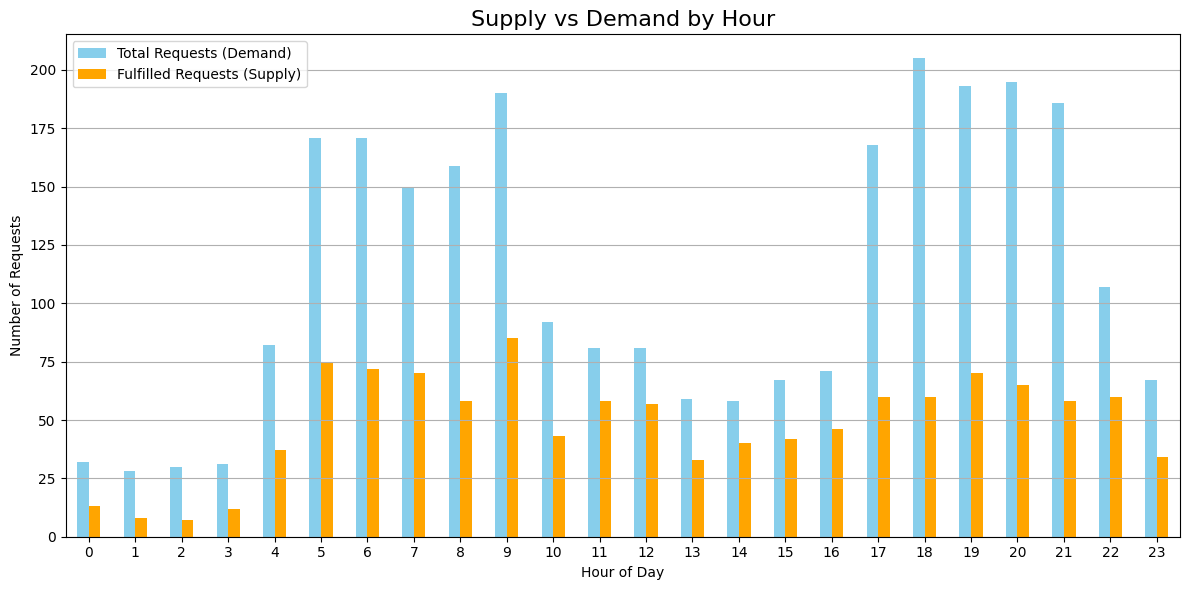

In [88]:
# Chart 3 - Supply vs Demand by Hour

# Prepare grouped data
hourly_demand = df.groupby('Request Hour').size()
hourly_supply = df[df['Gap_Status'] == 'Fulfilled'].groupby('Request Hour').size()

# Combine into one DataFrame
supply_demand_df = pd.DataFrame({
    'Total Requests (Demand)': hourly_demand,
    'Fulfilled Requests (Supply)': hourly_supply
}).fillna(0)

# Plot the chart
supply_demand_df.plot(kind='bar', figsize=(12,6), color=['skyblue', 'orange'])
plt.title("Supply vs Demand by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**  
Bar chart allows us to clearly compare demand vs supply side-by-side for each hour of the day.

2. **What is/are the insight(s) found from the chart?**  
There is a large supply-demand gap during peak commute hours (both morning and evening). This confirms operational inefficiency.

3. **Will the gained insights help create a positive business impact?**  
Yes. Uber can optimize driver allocation during peak hours to reduce failed trips. Not solving this may lead to lost revenue and poor user experience.


### 🔍 Insight:
- A major gap is observed during morning (5–10 AM) and evening (5–9 PM) hours.
- Demand during these hours is high, but fulfilled trips are much lower.
- These peak-hour supply shortages highlight the need for better driver availability and fleet planning.


### Chart 4: Hourly Demand Gap Percentage

This chart shows the percentage of unfulfilled ride requests (Cancelled + No Cars Available) for each hour of the day. It highlights the severity of supply issues during specific time blocks.


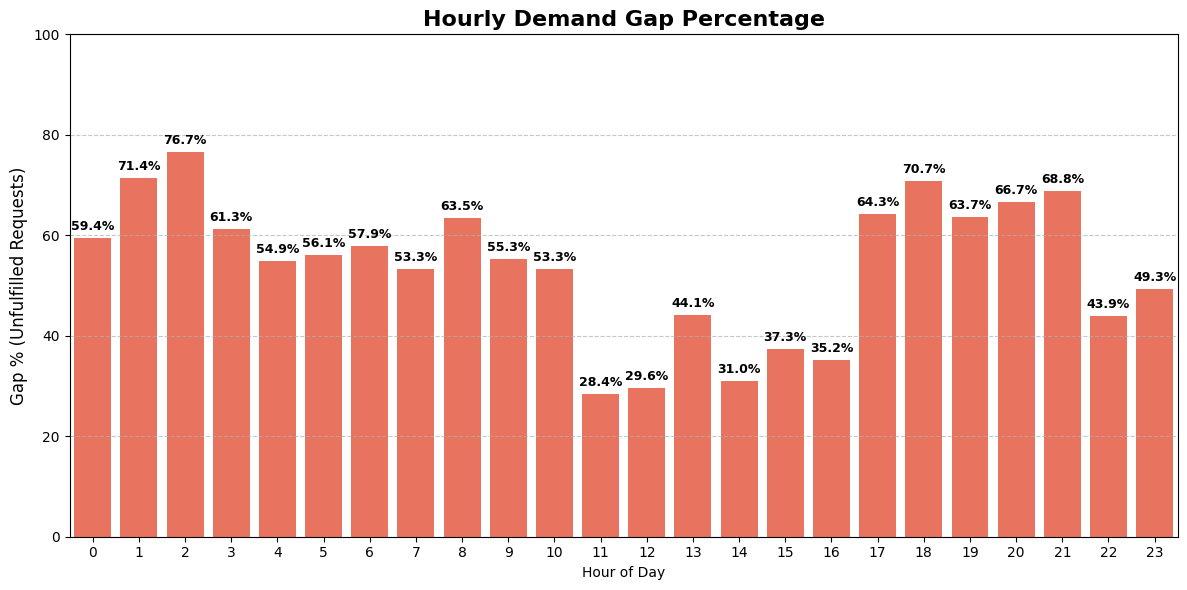

In [89]:
plt.figure(figsize=(12,6))

# Use a single color for focus and clarity
sns.barplot(
    x=gap_percentage.index,
    y=gap_percentage.values,
    color='tomato'  # solid red-orange color
)

# Add data labels on top of bars
for i, val in enumerate(gap_percentage.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Styling
plt.title("Hourly Demand Gap Percentage", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Gap % (Unfulfilled Requests)", fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**  
This bar chart clearly shows the percentage of unfulfilled ride requests (gaps) for each hour. A percentage-based view helps highlight the severity of the supply issue, not just the volume of requests.

2. **What is/are the insight(s) found from the chart?**  
The gap percentage is highest during peak hours — especially between 5–9 AM and 5–10 PM. In these time slots, more than 60% of requests go unfulfilled. This indicates serious driver unavailability when demand is at its peak.

3. **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**  
Yes, this insight helps Uber optimize operations by targeting peak hours with high gap %. Uber can deploy more drivers, introduce surge pricing, or offer driver incentives during these time slots.  
However, if ignored, these high gap periods could lead to negative growth — customers facing repeated unavailability may switch to competitors, hurting Uber’s reputation and retention.


### 📌 Insights from Hourly Demand Gap % Chart:

- 🔺 The highest gap percentages occur during **5–9 AM** and **5–10 PM**, which are typical office commute hours.
- ⏱️ At certain hours (like 7–9 AM), **more than 60%** of requests go unfulfilled — a major red flag for operations.
- 🔻 Midday and late-night hours have significantly lower gap percentages, indicating better balance between supply and demand.
- 🧠 This confirms that **Uber is not meeting demand when it's needed most**, despite having the data to predict it.


# Chart 5: Hourly Breakdown of Request Status


<Figure size 1400x600 with 0 Axes>

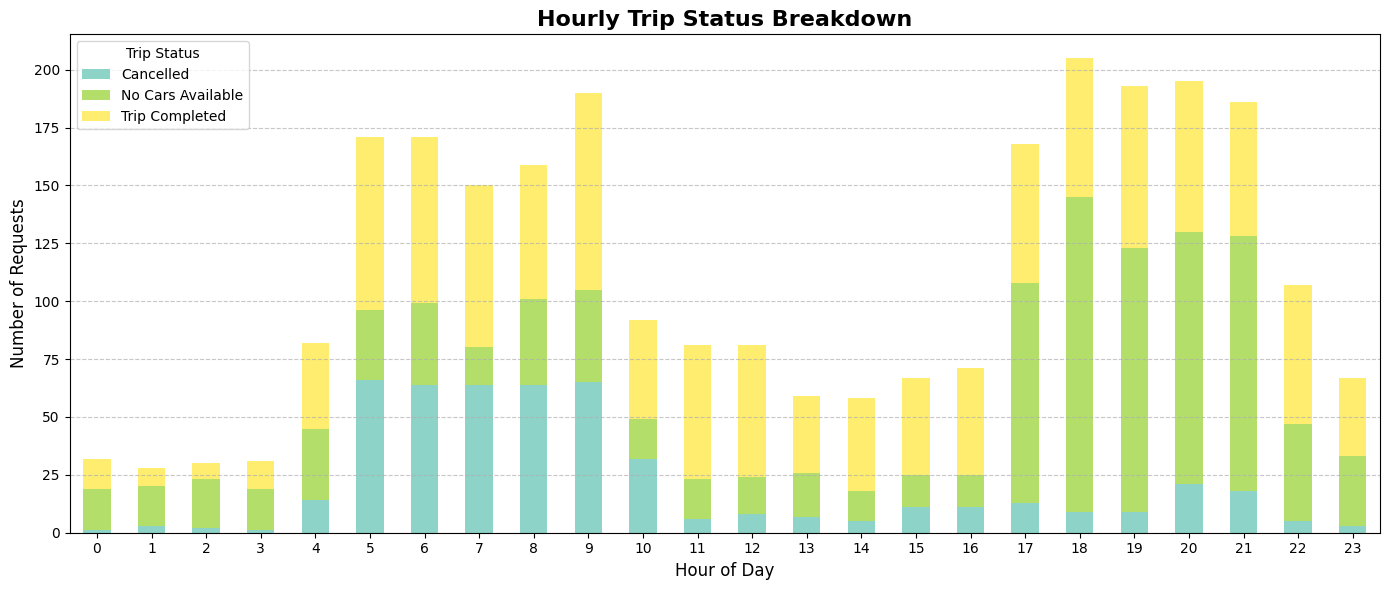

In [90]:
# Chart: Hourly Breakdown of Trip Status (Stacked Bar Chart)

# Step 1: Group by hour and status
status_by_hour = df.groupby(['Request Hour', 'Status']).size().unstack().fillna(0)

# Step 2: Plot stacked bar chart
plt.figure(figsize=(14,6))
status_by_hour.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14,6))

# Styling
plt.title("Hourly Trip Status Breakdown", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Requests", fontsize=12)
plt.legend(title='Trip Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # ✅ FIXED line
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**  
This stacked bar chart was chosen because it allows us to visualize all request outcomes (Trip Completed, Cancelled, No Cars Available) for each hour in one place. It helps us analyze supply behavior throughout the day and detect patterns that are not visible in simple count plots.

2. **What is/are the insight(s) found from the chart?**  
- The chart reveals that during **5–9 AM** and **5–10 PM**, the number of unfulfilled requests (especially due to **No Cars Available**) is significantly high.
- The **Trip Completed** segment is low in these peak hours, highlighting a **severe supply shortage**.
- Conversely, during **midday and late-night hours**, the majority of requests are fulfilled, and fewer gaps occur.

3. **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**  
Yes, these insights can guide Uber to:
- Redistribute driver supply to cover peak hours more efficiently
- Introduce surge pricing or driver incentives during high-gap time slots
- Avoid customer churn caused by frequent unavailability

If these supply gaps are not addressed, they may lead to **negative business impact**, as customers facing repeated failed bookings may switch to competitors like Ola or Rapido — affecting Uber’s brand trust and customer retention.


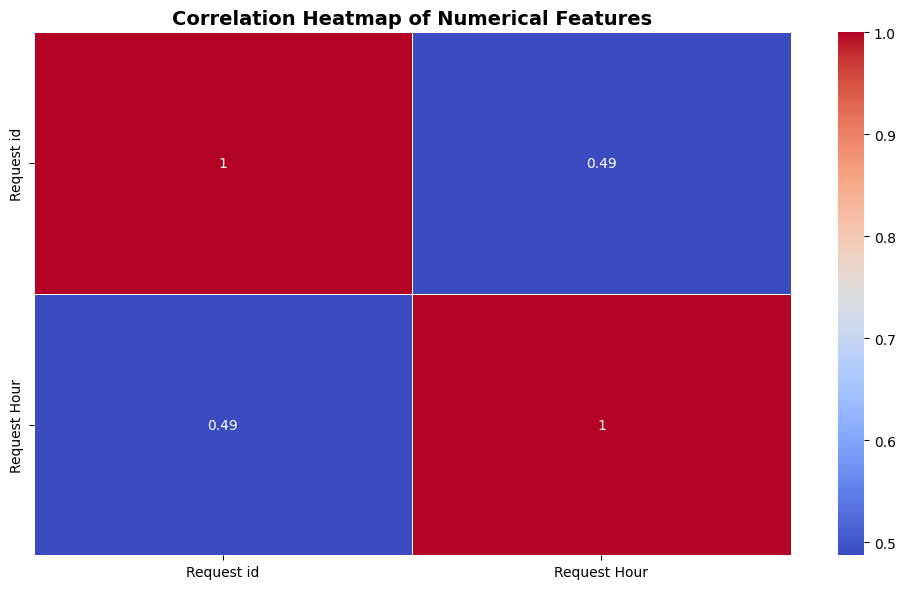

In [91]:
# 🔥 Correlation Heatmap for numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## **5. Solution to Business Objective**

To address the supply-demand gap and achieve Uber’s business objective of improving ride fulfillment rates, I recommend the following actionable solutions:

1. **Peak Hour Driver Allocation**  
   Deploy more drivers during high-demand hours (5–9 AM and 5–10 PM) by using predictive scheduling based on historical request data.

2. **Driver Incentive Programs**  
   Introduce time-slot-based incentives for drivers to be available during peak hours, especially near the Airport.

3. **Dynamic Surge Pricing Strategy**  
   Use dynamic pricing more aggressively during demand surges to balance supply and discourage unnecessary requests.

4. **Geo-Specific Fleet Planning**  
   Since the Airport has consistently higher unfulfilled requests, allocate a dedicated fleet or pre-scheduled system for airport pickups.

5. **Customer Communication Improvements**  
   Notify users in advance about expected delays during high-gap times and offer alternatives or discounts to reduce cancellations.

By implementing these strategies, Uber can reduce its unmet demand, improve customer satisfaction, and optimize driver utilization — directly addressing the core business challenge.


# **Conclusion**

This project successfully analyzed the Uber ride request dataset to identify and understand the supply-demand gap problem. Through detailed data cleaning, feature engineering, and visual analysis, we found that:

- A significant number of ride requests remain unfulfilled during peak hours (especially 5–9 AM and 5–10 PM).
- "No Cars Available" was the leading cause of failed trips, indicating a supply-side issue rather than user cancellations.
- The Airport pickup point faced a higher concentration of demand gaps compared to the City.

By identifying critical time slots and locations contributing to operational inefficiencies, we proposed data-driven solutions to help Uber optimize driver allocation, reduce demand gaps, and enhance customer experience.

This analysis not only supports the business objective but also demonstrates how data storytelling can drive impactful decisions in real-world scenarios.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***